# TASK 6.6.
# Table of Contents
## 1. Import libraries and dataset
### 1.1. Get data from Quandl
### 1.2. Import own dataset
## 2. Data cleaning, wrangling and consistency checks
## 3. Create a line chart 
## 4. Decomposition
## 5. Dickey-Fuller test
## 6. Differencing
## 7. Autocorrelations
---

## 1. Import libraries and dataset

In [138]:
import quandl
import nasdaqdatalink
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

### 1.1. Get data from Quandl


In [5]:
# Configure API key 

quandl.ApiConfig.api_key = 'BdcUX3SixijxzuyEYmdh'

In [7]:
# Importing data

data = quandl.get('WB/DATA')  

QuandlError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@quandl.com.

### 1.2. Import own dataset


*****I encountered an issue while importing the Quandlr dataset, so I have opted to use a customized version of my dataset. In Excel, I aggregated all low-scale crime incidents by summing them annually to streamline the analysis.*****

In [11]:
# Create path
path = '/Users/mariliamachado/Documents/CareerFoundry/Data Immersion/Achievement 6'

In [58]:
# Import dataset
data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Low-scale-crimes-Berlin.csv'), delimiter=';')


## 2. Data cleaning, wrangling and consistency checks


In [60]:
data.head()

,Year,Low-scale crimes
0,2012,534475
1,2013,546004
2,2014,549100
3,2015,573611
4,2016,580387


In [66]:
data.shape

(8, 2)

In [62]:
data.columns


Index(['Year', 'Low-scale crimes'], dtype='object')

In [68]:
# Convert 'Year' to datetime, so it's the index
data['Year'] = pd.to_datetime(data['Year'], format='%Y')  
data.set_index('Year', inplace=True)

In [70]:
data


,Low-scale crimes
Year,
2012-01-01,534475
2013-01-01,546004
2014-01-01,549100
2015-01-01,573611
2016-01-01,580387
2017-01-01,535681
2018-01-01,522588
2019-01-01,520086


In [72]:
data.index


DatetimeIndex(['2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [76]:
type(data)

pandas.core.frame.DataFrame

In [85]:
data.describe()

,Low-scale crimes
count,8.000000
mean,545241.500000
std,22067.445493
min,520086.000000
25%,531503.250000
50%,540842.500000
75%,555227.750000
max,580387.000000


I will not check duplicates and missing values because I know the dataset is complete. I will not use a subset of the data, since it's not necessary.

## 3. Create a line chart 

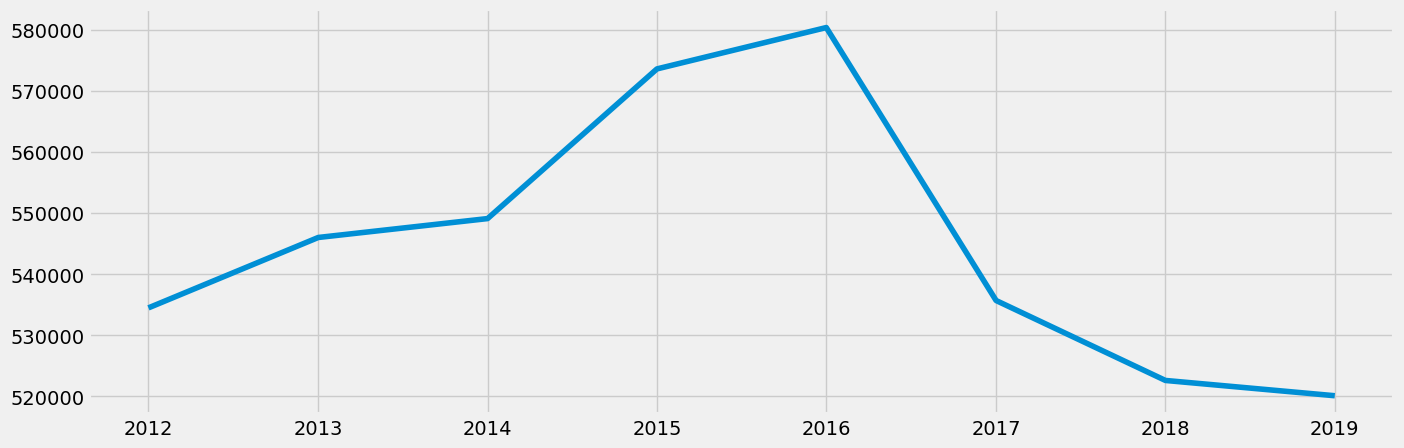

In [80]:
# Plot the data using matplotlib

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

## 4. Decomposition

In [93]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [95]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

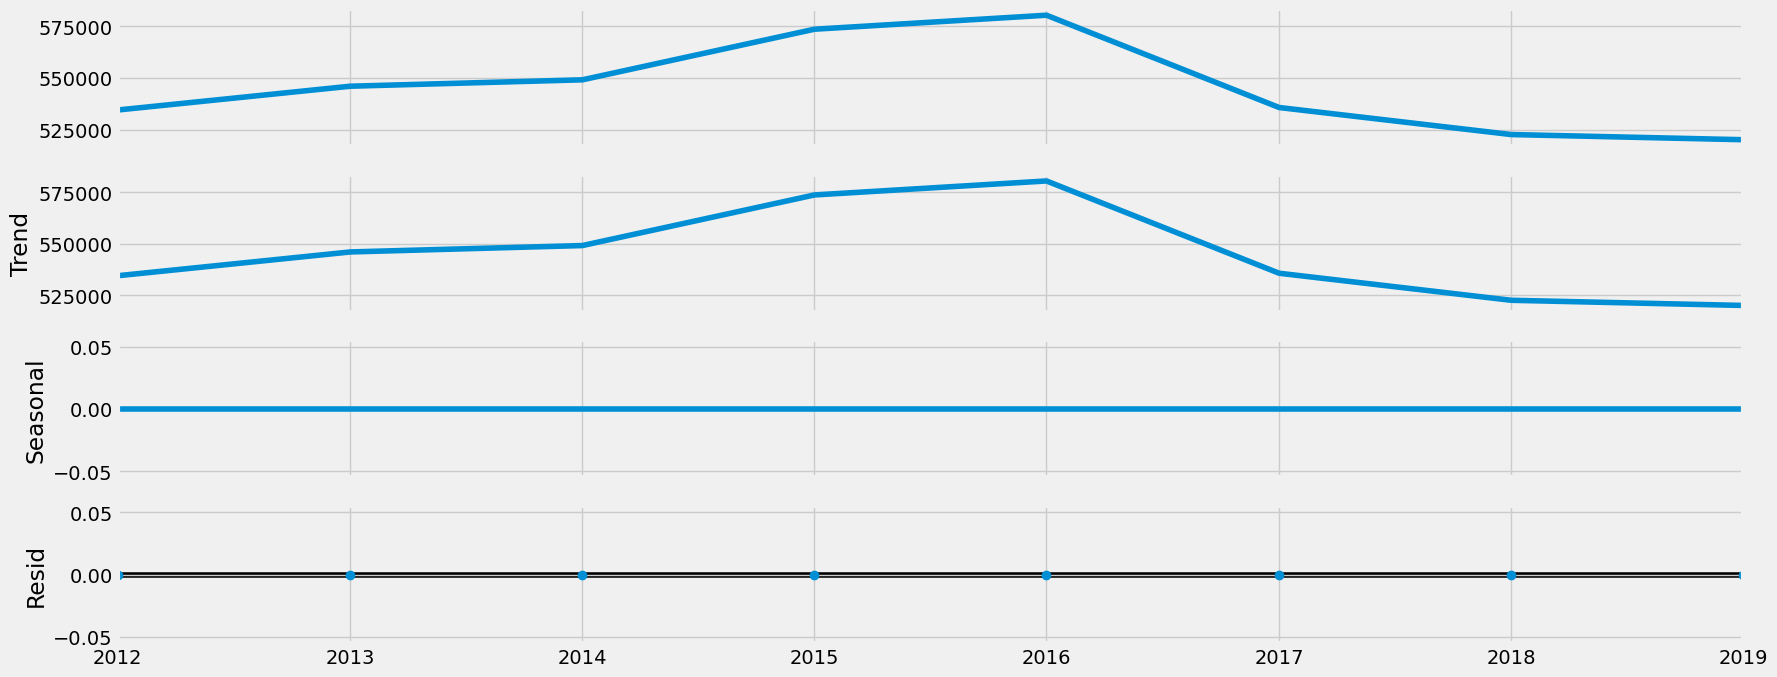

In [97]:
# Plot the separate components

decomposition.plot()
plt.show()

Looking at the data, we can see that from 2012 to 2016, there was a steady increase, reaching a peak in 2016. After that, the trend shifted, with a sharper decline between 2016 and 2017, followed by a more gradual decrease from 2017 to 2019.
There is no seasonality or noise, as indicated by the flat lines at the zero value. This is expected, given that the data is aggregated yearly. If we had monthly or weekly data from the same period, these lines might show more variation.

## 5. Dickey-Fuller test

In [106]:
# Dickey-Fuller Stationarity test

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Low-scale crimes'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.738672
p-value                        0.411305
Number of Lags Used            2.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


The null hypothesis is that the time series has a unit root (it is non-stationary). Since the p-value (0.411305) is greater than 0.05 and the test statistic is not more negative than the critical values (especially at the 5% level), we fail to reject the null hypothesis. This proves that the time series is non-stationary.

## 6. Differencing

In [112]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff = data - data.shift(1) 

In [114]:
# Remove missing values
data_diff.dropna(inplace = True)

In [116]:
data_diff.head()

,Low-scale crimes
Year,
2013-01-01,11529.0
2014-01-01,3096.0
2015-01-01,24511.0
2016-01-01,6776.0
2017-01-01,-44706.0


In [118]:
data_diff.columns

Index(['Low-scale crimes'], dtype='object')

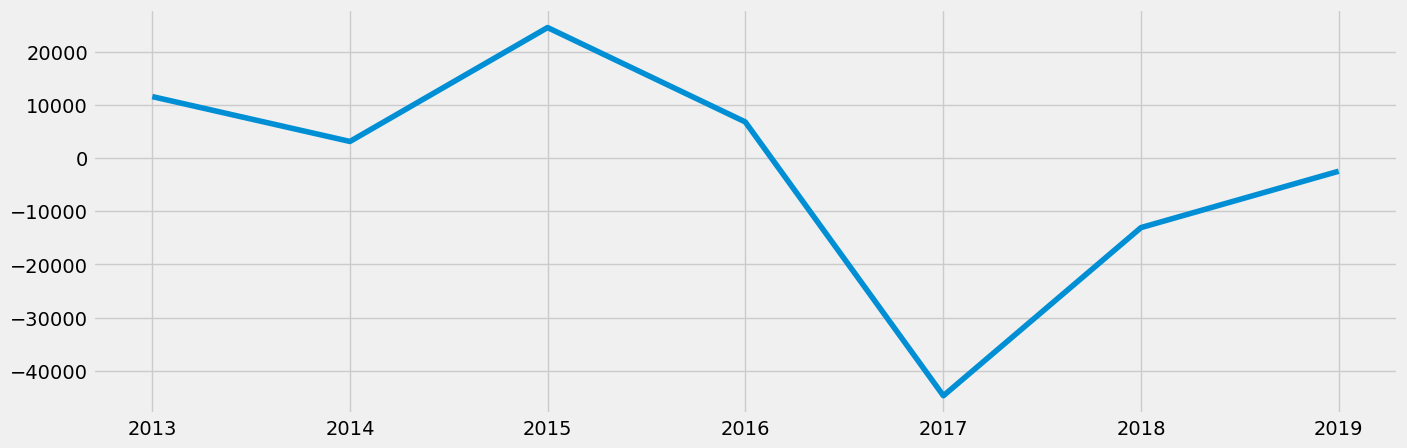

In [120]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [122]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.726331
p-value                        0.417600
Number of Lags Used            0.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


The test statistic is still larger than the critical values, so I will perform a second round of differencing.

In [125]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff2 = data_diff - data_diff.shift(1) 

In [127]:
# Remove missing values
data_diff2.dropna(inplace = True)

In [129]:
data_diff2.columns

Index(['Low-scale crimes'], dtype='object')

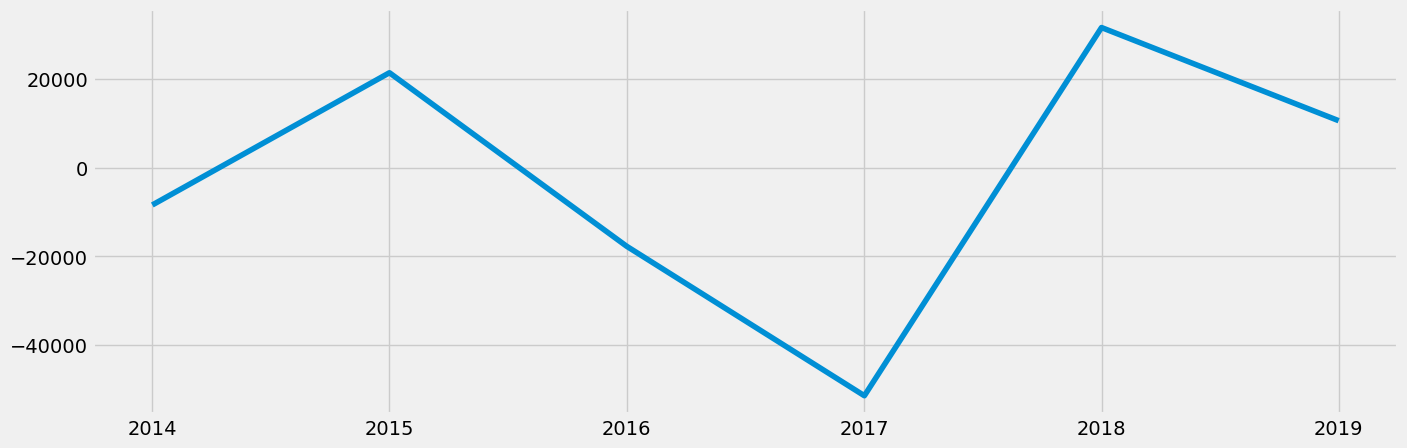

In [131]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [133]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -5.199941
p-value                        0.000009
Number of Lags Used            1.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


## 7. Autocorrelations

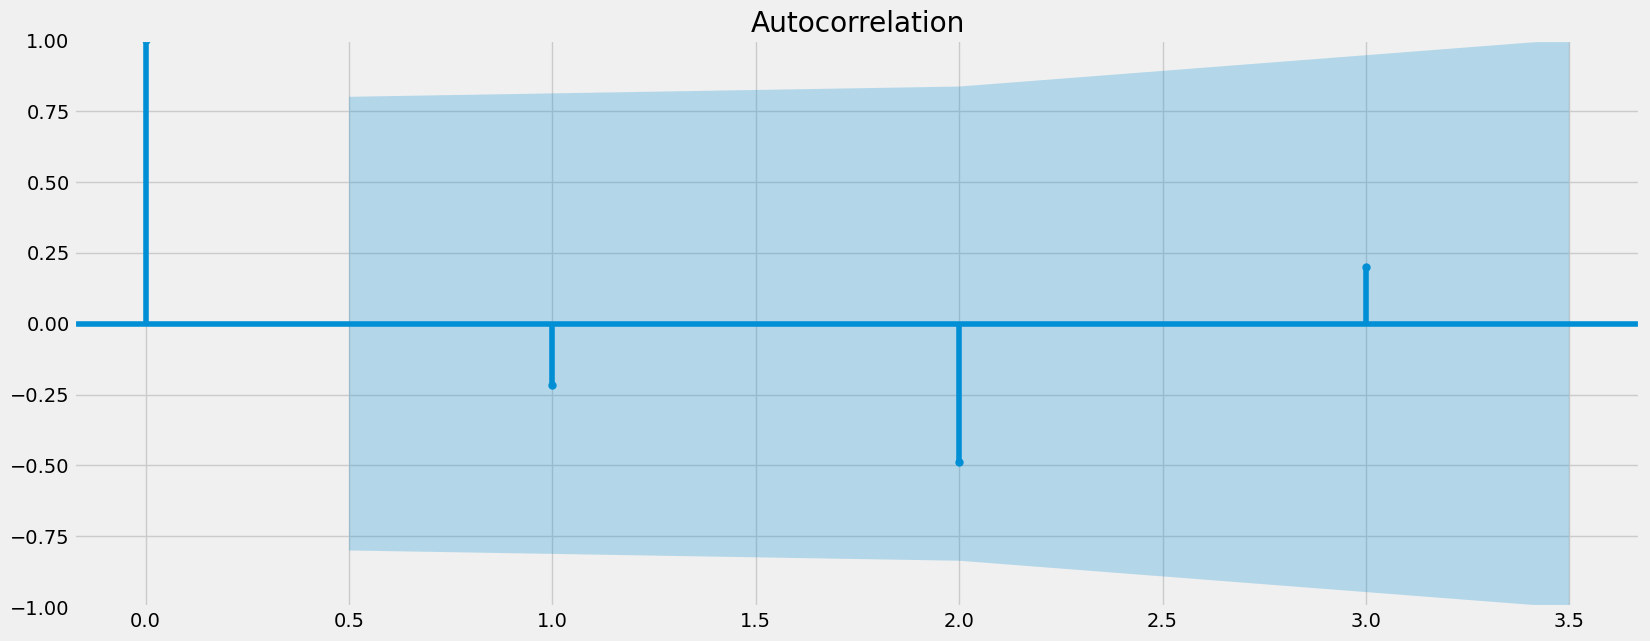

In [144]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Now, plot the autocorrelation function
plot_acf(data_diff2)
plt.show()
